<a href="https://colab.research.google.com/github/AkhilPadma/Decentralization-of-Energy-Using-PV-Batteries-/blob/main/DER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/energy_data.csv')
data.head(24)

,Timestamp,Solar_Generation_kW,Load_Consumption_kW,Tariff_Rs_per_kWh
0,2024-01-01 00:00:00,0.000000,1.398043,3.0
1,2024-01-01 01:00:00,0.000000,2.112628,3.0
2,2024-01-01 02:00:00,0.000000,2.314680,3.0
3,2024-01-01 03:00:00,0.000000,1.850465,3.0
4,2024-01-01 04:00:00,0.000000,2.339647,3.0
5,2024-01-01 05:00:00,0.000000,1.644932,3.0
6,2024-01-01 06:00:00,0.473764,0.942653,5.0
7,2024-01-01 07:00:00,1.531008,1.788049,5.0
8,2024-01-01 08:00:00,2.372068,2.031616,5.0
9,2024-01-01 09:00:00,3.716559,1.862080,5.0


In [3]:
print(data.columns)

Index(['Timestamp', 'Solar_Generation_kW', 'Load_Consumption_kW',
       'Tariff_Rs_per_kWh'],
      dtype='object')


In [4]:
data = data.rename(columns={
    "Solar_Generation_kW": "pv_kw",
    "Load_Consumption_kW": "load_kw"})


In [5]:
data["net_grid_kw"] = (data["load_kw"] - data["pv_kw"]).clip(lower=0)

# Excess solar = solar - load (if solar > load, you export to grid)
data["excess_solar_kw"] = (data["pv_kw"] - data["load_kw"]).clip(lower=0)

Summarization variability of solar generation and demand.


In [6]:
summary = {
    "annual_solar_kwh": data["pv_kw"].sum(),
    "annual_load_kwh": data["load_kw"].sum(),
    "annual_net_grid_kwh": data["net_grid_kw"].sum(),
    "annual_excess_solar_kwh": data["excess_solar_kw"].sum(),
    "pct_self_consumption": 100 * (1 - data["excess_solar_kw"].sum() / data["pv_kw"].sum())
                             if data["pv_kw"].sum() > 0 else np.nan
}

summary = pd.Series(summary)
summary

,0
annual_solar_kwh,13999.747417
annual_load_kwh,21866.786114
annual_net_grid_kwh,14826.502367
annual_excess_solar_kwh,6959.463670
pct_self_consumption,50.288648


# it means 6959 solar is going unutilized that is around 50% of energy generated

In [7]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data = data.set_index("Timestamp").sort_index()

In [8]:
assert isinstance(data.index, pd.DatetimeIndex), "Set timestamp as DatetimeIndex first" # checks if timestamps are set or not
need = {"pv_kw","load_kw","net_grid_kw","excess_solar_kw","Tariff_Rs_per_kWh"}
missing = need - set(data.columns)
assert not missing, f"Missing columns: {missing}"

In [9]:
data = data.copy()
data["self_consumed_kw"] = data["pv_kw"] - data["excess_solar_kw"]   # solar used onsite
data["month"] = data.index.month
data["hour"]  = data.index.hour
data["day"]   = data.index.floor("D")
data.sample(10)

,pv_kw,load_kw,Tariff_Rs_per_kWh,net_grid_kw,excess_solar_kw,self_consumed_kw,month,hour,day
Timestamp,,,,,,,,,
2024-08-10 22:00:00,0.000000,4.580281,3.0,4.580281,0.000000,0.000000,8,22,2024-08-10
2024-05-24 12:00:00,5.766072,3.184167,5.0,0.000000,2.581905,3.184167,5,12,2024-05-24
2024-05-24 11:00:00,5.740894,1.351418,5.0,0.000000,4.389476,1.351418,5,11,2024-05-24
2024-11-13 21:00:00,0.000000,4.120356,8.0,4.120356,0.000000,0.000000,11,21,2024-11-13
2024-03-03 12:00:00,6.559610,1.560739,5.0,0.000000,4.998870,1.560739,3,12,2024-03-03
2024-09-12 23:00:00,0.000000,2.302012,3.0,2.302012,0.000000,0.000000,9,23,2024-09-12
2024-03-02 05:00:00,0.000000,1.115782,3.0,1.115782,0.000000,0.000000,3,5,2024-03-02
2024-09-24 12:00:00,3.166232,2.188163,5.0,0.000000,0.978069,2.188163,9,12,2024-09-24
2024-01-15 04:00:00,0.000000,2.302757,3.0,2.302757,0.000000,0.000000,1,4,2024-01-15


In [10]:
data["imbalance_kw"] = data["pv_kw"] - data["load_kw"]
data["status"] = np.where(data["imbalance_kw"] > 0, "Surplus", "Deficit")
counts = data["status"].value_counts()
deficit_hours = int(counts.get("Deficit", 0))
surplus_hours = int(counts.get("Surplus", 0))
print({"deficit_hours": deficit_hours, "surplus_hours": surplus_hours})

{'deficit_hours': 5531, 'surplus_hours': 3253}


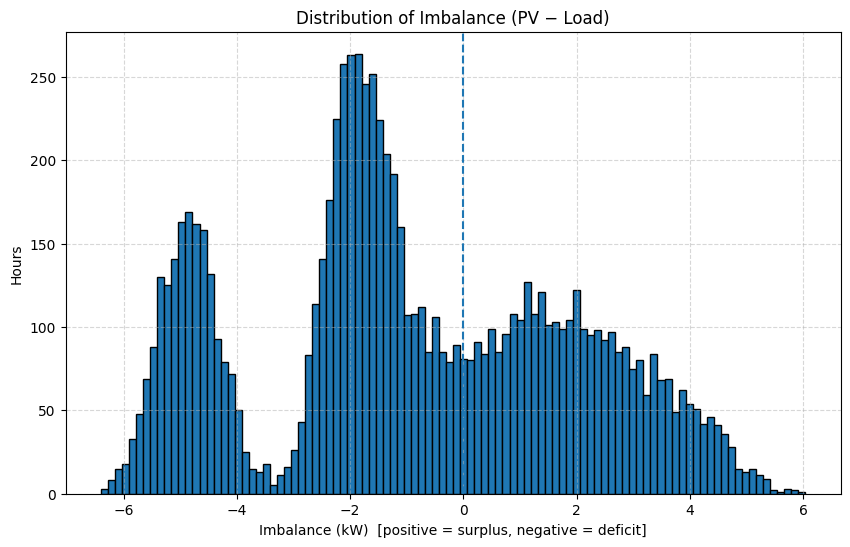

In [11]:
plt.figure(figsize=(10,6))
plt.hist(data["imbalance_kw"], bins=100, edgecolor="black")
plt.axvline(0, linestyle="--", linewidth=1.5)
plt.title("Distribution of Imbalance (PV − Load)")
plt.xlabel("Imbalance (kW)  [positive = surplus, negative = deficit]")
plt.ylabel("Hours")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The mass of the distribution lies left of 0, confirming more deficit hours (5,531) than surplus (3,253).

---




In [12]:
# A function to get any day from the dataset this will be helpful for future while generating plots
def get_day(df,day_str) :
    day = pd.to_datetime(day_str).date()

    mask = df.index.date == day

    if mask.any():
      return df.loc[mask]

    #If the given date is not found in df then it will apply below block and find the nearest date

    uniq = pd.to_datetime(pd.Series(df.index.normalize().unique()))
    nearest = uniq.iloc[np.argmin(np.abs(uniq - pd.Timestamp(day)))]
    print(f" {day_str} not found. Using closest: {nearest.date()}")
    return df.loc[df.index.normalize() == nearest]


In [13]:
#A function to get a week
def get_week(df, start_day_str):
    start = pd.to_datetime(start_day_str)
    end   = start + pd.Timedelta(days=7)
    sub = df.loc[start:end]
    if sub.empty:
        raise ValueError("Week slice is empty—check dates")
    return sub

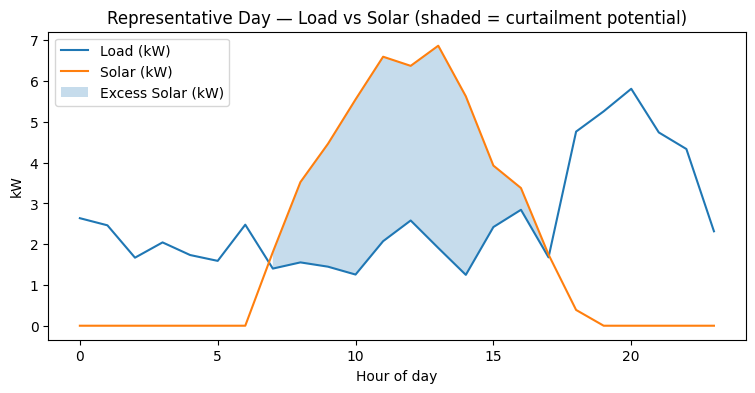

In [14]:
day_data = get_day(data, "2024-03-01")  # some random day was selected
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(day_data.index.hour, day_data["load_kw"], label="Load (kW)")
ax.plot(day_data.index.hour, day_data["pv_kw"],   label="Solar (kW)")
over = day_data["pv_kw"] > day_data["load_kw"]
ax.fill_between(day_data.index.hour,
                day_data["load_kw"], day_data["pv_kw"],
                where=over, alpha=0.25, label="Excess Solar (kW)")
ax.set_xlabel("Hour of day"); ax.set_ylabel("kW")
ax.set_title("Representative Day — Load vs Solar (shaded = curtailment potential)")
ax.legend(); plt.show()

Solar peaks midday (9h-14h), but the load is relatively low then.

Evening peak load (18–21h) happens when solar generation drops to zero.

Text(0.5, 1.0, 'Average Profiles — Weekday vs Weekend')

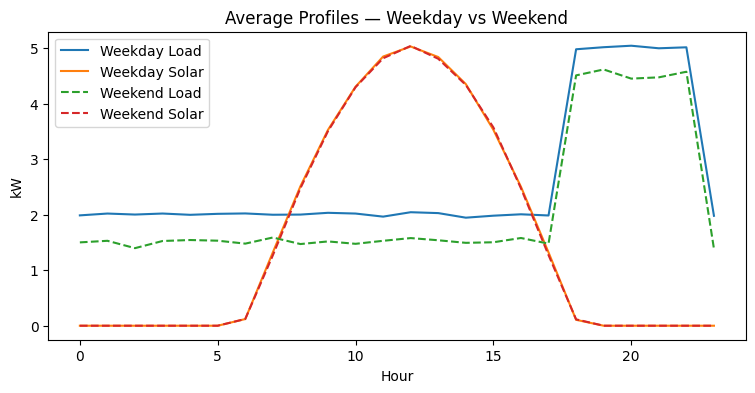

In [15]:
#weekdays vs Weekends
#python has the original calendar in it so from that it picsks the day of week
wkday = data[data.index.dayofweek < 5].groupby("hour").mean(numeric_only=True)
wkend = data[data.index.dayofweek >= 5].groupby("hour").mean(numeric_only=True)

fig, ax1 = plt.subplots(figsize=(9,4))
ax1.plot(wkday.index, wkday["load_kw"], label="Weekday Load")
ax1.plot(wkday.index, wkday["pv_kw"],   label="Weekday Solar")
ax1.plot(wkend.index, wkend["load_kw"], label="Weekend Load",  linestyle="--")
ax1.plot(wkend.index, wkend["pv_kw"],   label="Weekend Solar", linestyle="--")
ax1.set_xlabel("Hour"); ax1.set_ylabel("kW"); ax1.legend(loc="upper left")
ax1.set_title("Average Profiles — Weekday vs Weekend")

Weekday load : Fairly flat (~2 kW all day), with an evening spike around 18–21h.

Weekend load : Lower bas during day ~1.5 and sharprt base during evening ~5

On weekends, the gap between midday solar and low daytime load is even worse, meaning more curtailment potential.

To identify peak load periods and solar curtailment scenarios (where solar > load).


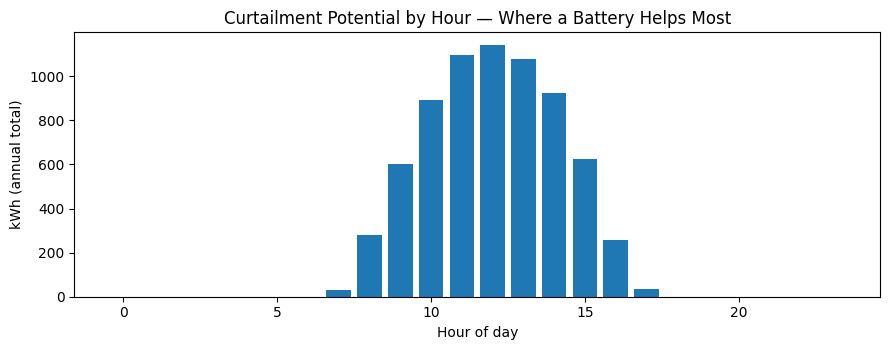

In [16]:
curtail_by_hr = data.groupby("hour")["excess_solar_kw"].sum()
fig, ax = plt.subplots(figsize=(9,3.6))
ax.bar(curtail_by_hr.index, curtail_by_hr.values)
ax.set_xlabel("Hour of day"); ax.set_ylabel("kWh (annual total)")
ax.set_title("Curtailment Potential by Hour — Where a Battery Helps Most")
plt.tight_layout(); plt.show()


Curtailment peaks between ~10:00–14:00 with over 1,000 kWh per year per hour wasted in some slots.

Before 8 AM and after 17 PM, curtailment is nearly zero — solar is gone or fully used.

This confirms that the entire solar excess window is about 5–6 hours midday.

In [17]:
monthly = data.groupby("month")[["self_consumed_kw","excess_solar_kw","net_grid_kw","load_kw"]].sum()

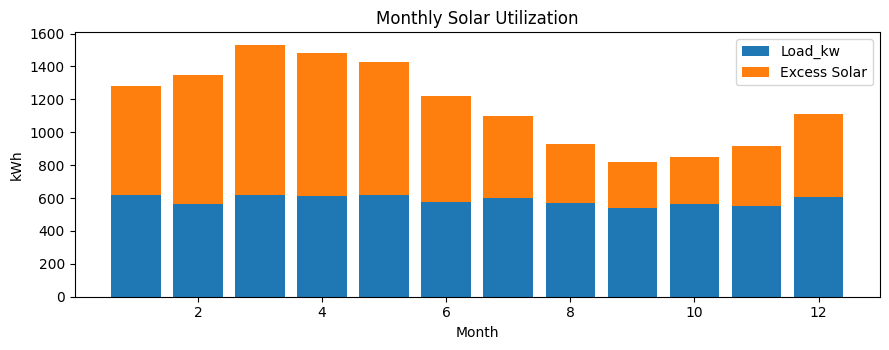

In [52]:
fig, ax = plt.subplots(figsize=(9,3.6))
ax.bar(monthly.index, monthly["self_consumed_kw"], label="Load_kw")
ax.bar(monthly.index, monthly["excess_solar_kw"],  bottom=monthly["self_consumed_kw"], label="Excess Solar")
ax.set_xlabel("Month"); ax.set_ylabel("kWh"); ax.set_title("Monthly Solar Utilization")
ax.legend(); plt.tight_layout(); plt.show()

Jan–May: Solar production is high, but ~50% is excess.

Jun–Sep: Production declines — better alignment with load.

Oct–Dec: Production is low overall, but still some wasted solar.

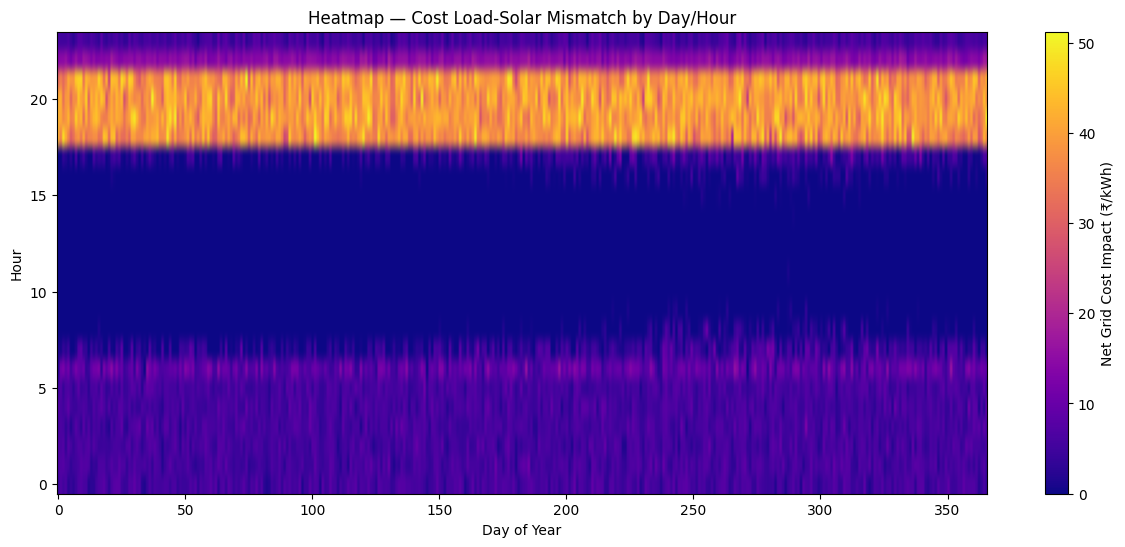

In [19]:
data["net_load_kw"] = (data["load_kw"] - data["pv_kw"]).clip(lower=0)
data["cost_impact"] = data["net_load_kw"] * data["Tariff_Rs_per_kWh"]

heatmap_data = data.pivot_table(index=data.index.hour,
                              columns=data.index.dayofyear,
                              values="cost_impact",
                              aggfunc="mean")

plt.figure(figsize=(15,6))
im = plt.imshow(heatmap_data, aspect="auto", origin="lower", cmap="plasma")
plt.colorbar(im, label="Net Grid Cost Impact (₹/kWh)")
plt.ylabel("Hour")
plt.xlabel("Day of Year")
plt.title("Heatmap — Cost Load-Solar Mismatch by Day/Hour")
plt.show()

Hot zone at ~19:00–22:00 (bright yellow band): Evening peak → load is high, solar is gone, tariff is expensive.

->This is where our battery discharge should target.

Secondary cost around ~05:00–07:00 (purple–orange band): Morning pre-sunrise demand → again, mismatch with no PV support.

Midday (10:00–16:00) is mostly dark/blue: Costs are negligible because PV offsets load + tariffs are lower.

# Battery sizing optimization and Curtailment & grid services


In [20]:
specs = pd.read_csv("/content/battery_specs.csv")


In [21]:
#For robustness we are doing this and may be when we upload other datasets the column names might be different so to accompny that we are doing this step here
if "capacity_kwh" not in specs.columns:
    for alt in ["energy_kwh","size_kwh","capacity (kwh)"]:
        if alt in specs.columns: specs["capacity_kwh"] = specs[alt]; break
if "max_kw" not in specs.columns:
    for alt in ["power_kw","max_power_kw","power (kw)"]:
        if alt in specs.columns: specs["max_kw"] = specs[alt]; break
if "rte" not in specs.columns:
    for alt in ["round_trip_efficiency","roundtrip_efficiency","efficiency"]:
        if alt in specs.columns: specs["rte"] = specs[alt]; break
if "degrade_inr_per_kwh" not in specs.columns:
    for alt in ["degradation_inr_per_kwh_throughput","degradation_rs_per_kwh","degrade_rs_per_kwh"]:
        if alt in specs.columns: specs["degrade_inr_per_kwh"] = specs[alt]; break
if "max_kw" not in specs.columns and "c_rate" in specs.columns and "capacity_kwh" in specs.columns:
    specs["max_kw"] = specs["c_rate"] * specs["capacity_kwh"]


In [22]:
need = {"capacity_kwh","max_kw","rte","degrade_inr_per_kwh"}
missing = need - set(specs.columns)
assert not missing, f"battery_specs.csv missing: {missing}"

# converting them to float values because we need them in future for calculations
specs = specs.astype({"capacity_kwh":"float64","max_kw":"float64","rte":"float64","degrade_inr_per_kwh":"float64"})

specs

,size_kwh,max_kw,round_trip_efficiency,capex_inr,degradation_inr_per_kwh_throughput,calendar_loss_pct_per_year,notes,capacity_kwh,rte,degrade_inr_per_kwh
0,50,25.0,0.90,2200000,1.20,2.0,"LFP, 0.5C",50.0,0.90,1.20
1,100,50.0,0.92,3700000,1.10,2.0,"LFP, 0.5C",100.0,0.92,1.10
2,150,75.0,0.92,5100000,1.00,2.0,"LFP, 0.5C",150.0,0.92,1.00
3,200,100.0,0.93,6400000,0.90,1.8,"LFP, 0.5C",200.0,0.93,0.90
4,300,150.0,0.93,8800000,0.85,1.8,"LFP, 0.5C",300.0,0.93,0.85


In [23]:
tariff = pd.read_csv("/content/tariff_demand_charge_2024.csv") # loading the tarrif_demand dataset
tariff.head(6)

,month,demand_charge_inr_per_kw
0,1,500
1,2,500
2,3,550
3,4,600
4,5,650
5,6,700


In [24]:
demand_rate_map = dict(zip(tariff["month"], tariff["demand_charge_inr_per_kw"]))
#this is a map so it has key's and its values like for key 1 it gives us the demand charge of 1

In [25]:
#baseline model here we calculate the things without battery
#So here without battery the electricity is only from local grid

def baseline_bill(df, demand_rate_map, price_col="price"):
    import_kw = (df["load_kw"] - df["pv_kw"]).clip(lower=0)
    energy_cost = (import_kw * df[price_col]).sum()

    monthly_peak_kw = import_kw.groupby([df.index.year, df.index.month]).max()
    monthly_peak_kw.index = monthly_peak_kw.index.set_names(["year","month"])

    #basically demand cost is the fine we for hitting max spike in that month
    #it is considerd everymonth other than energy cost from local grid

    demand_cost = 0.0
    for (yr, mo), peak in monthly_peak_kw.items():
        demand_cost += peak * demand_rate_map.get(mo, 0.0)

    return {"energy_cost": energy_cost,
            "demand_cost": demand_cost,
            "total": energy_cost + demand_cost}


In [26]:
baseline = baseline_bill(data, demand_rate_map, price_col="Tariff_Rs_per_kWh")
baseline = pd.Series(baseline)
baseline

,0
energy_cost,82298.759644
demand_cost,44684.154051
total,126982.913695


# **Demand cost ≈ 35% of total bill → This tell's us shaving peaks is as important as reducing energy imports.**

**Battery Rules** :

- charge when PV surplus
- Discharge at Peak prices
- Grid charge only if it is economical
-  In MID price hours, hold energy (unless SoC is ~full or you'd create a new peak )     

In [27]:
price_col = "Tariff_Rs_per_kWh"
load_col  = "load_kw"

In [28]:
#function to divide the grid price values
def tou_bands(df, price_col):
    tiers = np.sort(df[price_col].unique())
    cheap = tiers[0]
    peak  = tiers[-1]
    mid   = tiers[-2] if len(tiers) >= 3 else cheap
    return cheap, mid, peak

In [29]:
# we will check this margin whether there is a feasibility to charge at cheap prices
def arbitrage_margin(cheap, peak, rte, degrade_rs_per_kwh):
    # profit = (peak - cheap) - extra cost due to charge losses - degradation ₹/kWh
    loss_term = cheap * (1.0/float(rte) - 1.0)  # extra kWh needed at cheap due to inefficiency
    return (peak - cheap) - loss_term - degrade_rs_per_kwh

In [30]:
def simulate_battery_tou(
    df,
    demand_rate_map,
    capacity_kwh,
    max_kw,
    rte,
    degrade_rs_per_kwh,
    price_col,
    allow_grid_charge=True,
    soc_start=0.0):

    cheap, mid, peak = tou_bands(df, price_col) # gets from the tou_bands function
    can_arb = arbitrage_margin(cheap, peak, rte, degrade_rs_per_kwh) > 0 #checking feasibility


    # Baseline monthly peak (after PV, before battery) to limit grid-charging
    import_kw = (df["load_kw"] - df["pv_kw"]).clip(lower=0)
    monthly_peak = import_kw.groupby(df.index.month).max()

    # Simulation loop
    soc = float(soc_start) # state of charge it ranges from 0 -> capacity
    energy_cost = 0.0 #net*tarrif
    throughput_kwh = 0.0 # the sum of all discharged energy, a measure of battery usage intensity.
    monthly_peak_after = {}

    # so there are cases how battery can be use below block considers every case

    for t, row in df.iterrows():
        mo    = t.month
        price = float(row[price_col])
        load  = float(row["load_kw"])
        pv    = float(row["pv_kw"])

        net_load = max(0.0, load - pv)   # kW that must be supplied (battery or grid)
        excess   = max(0.0, pv - load)   # PV surplus (curtailment if not stored)

        # A) Charge from PV surplus (avoid curtailment)
        if excess > 0 and soc < capacity_kwh:
            ch = min(excess, max_kw, (capacity_kwh - soc)/rte)
            soc += ch * rte  # charging loss applied

        # B) Discharge logic (prioritize peak hour)
        # shave peaks(basically means if at non-peak hour about to create a new monthly peak)
        if net_load > 0 and soc > 0:
            if price == peak:
                # Discharge of battery as much as possible in peak
                d = min(net_load, soc, max_kw)
                soc -= d; net_load -= d
                throughput_kwh += d
            else:
                # If we're about to set a new monthly peak at mid price, shave it
                if net_load > monthly_peak_after.get(mo, 0.0) and net_load > monthly_peak.loc[mo]:
                    d = min(net_load - monthly_peak.loc[mo], soc, max_kw)
                    if d > 0:
                        soc -= d; net_load -= d
                        throughput_kwh += d

        # C) Grid-charge logic (only in CHEAP price hours, if arbitrage makes > 0)
        if allow_grid_charge and price == cheap and can_arb and soc < capacity_kwh:
            headroom = max(0.0, float(monthly_peak.loc[mo]) - net_load) #Because if we hit new peak again this thing will be of no use since we need to pay fine for hitting new spike
            chg = min(max_kw, (capacity_kwh - soc)/rte, headroom)
            if chg > 0:
                soc += chg * rte
                energy_cost += chg * price       # pay to buy this energy
                net_load += chg                  # charging adds to import (but capped by headroom i.e less than monthly peak)

        # D) Free a little space at MID price only if nearly full (make room for upcoming PV)
        if price == mid and soc >= 0.95*capacity_kwh and net_load > 0:
            d = min(net_load, soc*0.3, max_kw)   # small controlled discharge
            if d > 0:
                soc -= d; net_load -= d
                throughput_kwh += d

        # E) Pay remaining import & record the peak
        if net_load > 0:
            energy_cost += net_load * price
            monthly_peak_after[mo] = max(monthly_peak_after.get(mo, 0.0), net_load)

    # Demand charge & degradation
    demand_cost = sum(monthly_peak_after.get(m, 0.0) * float(demand_rate_map.get(m, 0.0)) for m in range(1,13))
    degradation_cost = throughput_kwh * float(degrade_rs_per_kwh)

    total_cost = energy_cost + demand_cost + degradation_cost

    return {
        "tiers": {"cheap": cheap, "mid": mid, "peak": peak},
        "arbitrage_margin_rs_per_kwh": arbitrage_margin(cheap, peak, rte, degrade_rs_per_kwh),
        "energy_cost": energy_cost,
        "demand_cost": demand_cost,
        "degradation_cost": degradation_cost,
        "total_cost": total_cost,
        "throughput_kwh": throughput_kwh
    }

In [31]:
def evaluate_candidates(df, demand_rate_map, specs,
                        allow_grid_charge, label, price_col="Tariff_Rs_per_kWh"):
    base = baseline_bill(df, demand_rate_map, price_col=price_col)
    rows = []
    for a, s in specs.iterrows():
        res = simulate_battery_tou(
            df=df,
            demand_rate_map=demand_rate_map,
            capacity_kwh=float(s["capacity_kwh"]),
            max_kw=float(s["max_kw"]),
            rte=float(s["rte"]),
            degrade_rs_per_kwh=float(s["degrade_inr_per_kwh"]),
            price_col=price_col,
            allow_grid_charge=allow_grid_charge
        )
        rows.append({
            "strategy": label,
            "capacity_kwh": float(s["capacity_kwh"]),
            "max_kw": float(s["max_kw"]),
            "rte": float(s["rte"]),
            **{k: res[k] for k in ["energy_cost","demand_cost","degradation_cost","total_cost","throughput_kwh",
                                   "arbitrage_margin_rs_per_kwh"]},
            "baseline_total": base["total"],
            "savings_vs_baseline": base["total"] - res["total_cost"]
        })
    res = pd.DataFrame(rows).sort_values("total_cost")
    return base, res



In [32]:
base, pv_only = evaluate_candidates(data, demand_rate_map, specs, allow_grid_charge=False, label="PV-only") # allow_grid_charges is false here

print("Baseline total ₹:", round(base["total"], 0))
print("\nPV-only (no grid charge):"); display(pv_only)

Baseline total ₹: 126983.0

PV-only (no grid charge):


,strategy,capacity_kwh,max_kw,rte,energy_cost,demand_cost,degradation_cost,total_cost,throughput_kwh,arbitrage_margin_rs_per_kwh,baseline_total,savings_vs_baseline
4,PV-only,300.0,150.0,0.93,35077.024556,43078.283894,5030.944469,83186.252919,5918.758199,3.924194,126982.913695,43796.660776
3,PV-only,200.0,100.0,0.93,35854.528830,43078.283894,5240.536899,84173.349624,5822.818777,3.874194,126982.913695,42809.564072
2,PV-only,150.0,75.0,0.92,36464.571065,43078.283894,5747.829202,85290.684161,5747.829202,3.739130,126982.913695,41692.229534
1,PV-only,100.0,50.0,0.92,36853.633718,43078.283894,6270.018338,86201.935951,5700.016671,3.639130,126982.913695,40780.977744
0,PV-only,50.0,25.0,0.90,37702.332531,43078.283894,6711.693596,87492.310021,5593.077996,3.466667,126982.913695,39490.603674


In [33]:
a,   grid_ok  = evaluate_candidates(data, demand_rate_map, specs, allow_grid_charge=True,  label="Grid-OK")
print("\nGrid allowed (cheap charge permitted):"); display(grid_ok)


Grid allowed (cheap charge permitted):


,strategy,capacity_kwh,max_kw,rte,energy_cost,demand_cost,degradation_cost,total_cost,throughput_kwh,arbitrage_margin_rs_per_kwh,baseline_total,savings_vs_baseline
4,Grid-OK,300.0,150.0,0.93,67824.908486,44684.154051,7015.378182,119524.440720,8253.386096,3.924194,126982.913695,7458.472975
3,Grid-OK,200.0,100.0,0.93,67579.851529,44684.154051,7437.474280,119701.479860,8263.860311,3.874194,126982.913695,7281.433835
2,Grid-OK,150.0,75.0,0.92,67969.496578,44684.154051,8267.148580,120920.799209,8267.148580,3.739130,126982.913695,6062.114486
1,Grid-OK,100.0,50.0,0.92,67831.747906,44684.154051,9097.690420,121613.592377,8270.627654,3.639130,126982.913695,5369.321318
0,Grid-OK,50.0,25.0,0.90,69009.617441,44684.154051,9867.522759,123561.294252,8222.935632,3.466667,126982.913695,3421.619443


In [34]:
# Picking overall best from both the cases
best_row = min([pv_only.iloc[0], grid_ok.iloc[0]], key=lambda r: r["total_cost"])
print("\n For Our Optimized Battery : ")
print(f"Strategy: {best_row['strategy']}, "
      f"Capacity: {best_row['capacity_kwh']} kWh, "
      f"Max kW: {best_row['max_kw']}, "
      f"Total ₹ {best_row['total_cost']:.0f}, "
      f"Savings vs baseline ₹ {best_row['savings_vs_baseline']:.0f}, "
      f"Throughput {best_row['throughput_kwh']:.1f} kWh/yr, ")



 For Our Optimized Battery : 
Strategy: PV-only, Capacity: 300.0 kWh, Max kW: 150.0, Total ₹ 83186, Savings vs baseline ₹ 43797, Throughput 5918.8 kWh/yr, 


# 300 Kw battery giving us the optimized results

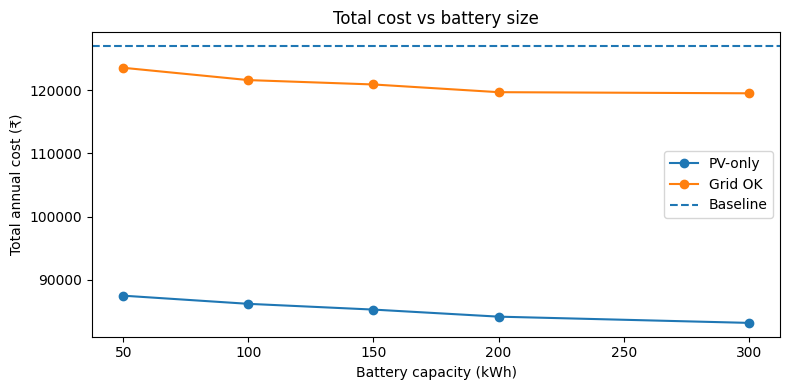

In [35]:
plt.figure(figsize=(8,4))
plt.plot(pv_only["capacity_kwh"], pv_only["total_cost"], marker="o", label="PV-only")
plt.plot(grid_ok["capacity_kwh"], grid_ok["total_cost"], marker="o", label="Grid OK")
plt.axhline(baseline["total"], linestyle="--", label="Baseline")
plt.xlabel("Battery capacity (kWh)"); plt.ylabel("Total annual cost (₹)")
plt.title("Total cost vs battery size")
plt.legend(); plt.tight_layout(); plt.show()

BY using above functions we can pick up the battery when  given solar, load, and tariff data, it recommends an optimal battery size.



# Grid Services - we get payed by grid service this happens in 2 cases a way to reduce our total energy costs

1. supply > demand it pays for reg_up like for charging battery

2. Demand > supply - it even pays for the discharge of batter

In [36]:
#Loading Grid services signal dataset
svc = pd.read_csv("/content/grid_services_signal_2024.csv", parse_dates=["timestamp"]).set_index("timestamp").sort_index()
svc.head(3)

,reg_up_kw,reg_down_kw
timestamp,,
2024-01-01 00:00:00,5.66,5.55
2024-01-01 01:00:00,3.50,5.70
2024-01-01 02:00:00,4.90,4.67


In [37]:
def simulate_with_services(
    df_in,                 # use 'data' (or your shifted version)
    svc,  # DataFrame aligned to df_in.index with ['reg_up_kw','reg_down_kw'] (optionally *_price)
    demand_rate_map,
    capacity_kwh,
    max_kw,
    rte,
    degrade_rs_per_kwh,
    price_col="Tariff_Rs_per_kWh",
    allow_grid_charge=False,
    soc_start=0.0,
    service_priority=True,
    AVAIL_RS_PER_KW_UP=0.50,     # ₹/kW·h availability revenue (tune to your market)
    AVAIL_RS_PER_KW_DOWN=0.40,   # ₹/kW·h availability revenue (down)
    MOVED_ENERGY_FRACTION=0.08   # small fraction of offered kW that actually cycles
):
    """
    Battery + Services model:
      • Services pay mostly for availability (₹/kW·h), not huge energy throughput.
      • Only a small fraction of offered capacity moves energy.
      • Grid-charging allowed only at CHEAP price and capped below baseline monthly peaks.

    """
    df = df_in.copy()
    cheap, mid, peak = tou_bands(df, price_col)
    can_arb = arbitrage_margin(cheap, peak, rte, degrade_rs_per_kwh) > 0

    # Baseline monthly peak (after PV, before battery): used to cap grid-charge so you don't create new peaks
    import_baseline = (df[load_col] - df["pv_kw"]).clip(lower=0)
    baseline_monthly_peak = import_baseline.groupby(df.index.month).max()

    # State and tallies
    soc = float(soc_start)
    energy_cost = 0.0
    demand_peak_after = {}
    degradation_kwh = 0.0
    service_revenue = 0.0
    curtailment_kwh = 0.0
    export_kwh = 0.0

    for t, row in df.iterrows():
        mo    = t.month
        price = float(row[price_col])
        load  = float(row[load_col])
        pv    = float(row["pv_kw"])

        # Net after instantaneous self-consumption
        net_load = max(0.0, load - pv)
        excess   = max(0.0, pv - load)

        if service_priority:
            # -------- Services (availability + tiny energy movement)
            up_req   = float(svc.loc[t, "reg_up_kw"])   if "reg_up_kw"   in svc.columns else 0.0
            down_req = float(svc.loc[t, "reg_down_kw"]) if "reg_down_kw" in svc.columns else 0.0

            # Capability this hour
            offer_up_kw   = min(max_kw, soc)                       # can discharge up to SoC (kWh)
            offer_down_kw = min(max_kw, (capacity_kwh - soc))      # can charge into headroom

            avail_up   = min(up_req, offer_up_kw)
            avail_down = min(down_req, offer_down_kw)

            # Availability revenue (paid regardless of actual movement)
            service_revenue += avail_up   * AVAIL_RS_PER_KW_UP
            service_revenue += avail_down * AVAIL_RS_PER_KW_DOWN

            # Model small net movement caused by regulation
            move_up_kwh   = avail_up   * MOVED_ENERGY_FRACTION     # discharge a little
            move_down_kwh = avail_down * MOVED_ENERGY_FRACTION     # charge a little

            # Apply DOWN (charge) first, but never raise monthly peak (cap by headroom)
            if move_down_kwh > 0 and soc < capacity_kwh:
                headroom = max(0.0, float(baseline_monthly_peak.loc[mo]) - net_load)
                chg = min(move_down_kwh, (capacity_kwh - soc)/rte, headroom)
                if chg > 0:
                    soc += chg * rte
                    energy_cost += chg * price  # Pay to buy this energy (if grid charging is allowed)
                    net_load    += chg         # Charging adds to import (but capped by headroom)
                    degradation_kwh += chg


            # Apply UP (discharge) next; serve local load first then export if any
            if move_up_kwh > 0 and soc > 0:
                d = min(move_up_kwh, soc)
                if d > 0:
                    soc -= d
                    used_local = min(net_load, d)
                    net_load  -= used_local
                    d         -= used_local
                    export_kwh += max(0.0, d)      # remaining goes to grid
                    degradation_kwh += move_up_kwh


            # -------- Normal PV-first behavior (after services)

            # Charge from PV surplus
            if excess > 0 and soc < capacity_kwh:
                ch = min(excess, max_kw, (capacity_kwh - soc)/rte)
                soc += ch * rte
                excess -= ch

            # Discharge to reduce imports at mid/peak prices (peak shaving + arbitrage)
            if net_load > 0 and soc > 0 and price >= mid:
                d = min(net_load, soc, max_kw)
                soc -= d
                net_load -= d
                degradation_kwh += d

            # Grid-charge only at CHEAP and never create new monthly peaks
            if allow_grid_charge and price == cheap and soc < capacity_kwh and can_arb:
                headroom = max(0.0, float(baseline_monthly_peak.loc[mo]) - net_load)
                chg = min(max_kw, (capacity_kwh - soc)/rte, headroom)
                if chg > 0:
                    soc += chg * rte
                    energy_cost += chg * price
                    net_load    += chg
                    degradation_kwh += chg

            # Pay remaining import & record monthly peaks
            if net_load > 0:
                energy_cost += net_load * price
                demand_peak_after[mo] = max(demand_peak_after.get(mo, 0.0), net_load)

            # Remaining PV surplus is export/curtail (no FiT assumed)
            if excess > 0:
                export_kwh += excess
                curtailment_kwh += excess

        else :
            # -------- Normal PV-first behavior (no services)

            # Charge from PV surplus
            if excess > 0 and soc < capacity_kwh:
                ch = min(excess, max_kw, (capacity_kwh - soc)/rte)
                soc += ch * rte
                excess -= ch

            # Discharge to reduce imports at mid/peak prices (peak shaving + arbitrage)
            if net_load > 0 and soc > 0 and price >= mid:
                d = min(net_load, soc, max_kw)
                soc -= d
                net_load -= d
                degradation_kwh += d

            # Grid-charge only at CHEAP and never create new monthly peaks
            if allow_grid_charge and price == cheap and soc < capacity_kwh and can_arb:
                headroom = max(0.0, float(baseline_monthly_peak.loc[mo]) - net_load)
                chg = min(max_kw, (capacity_kwh - soc)/rte, headroom)
                if chg > 0:
                    soc += chg * rte
                    energy_cost += chg * price
                    net_load    += chg
                    degradation_kwh += chg

            # Pay remaining import & record monthly peaks
            if net_load > 0:
                energy_cost += net_load * price
                demand_peak_after[mo] = max(demand_peak_after.get(mo, 0.0), net_load)

            # Remaining PV surplus is export/curtail (no FiT assumed)
            if excess > 0:
                export_kwh += excess
                curtailment_kwh += excess

    # Demand charge & degradation ₹
    demand_cost = float(sum(demand_peak_after.get(m, 0.0) * demand_rate_map.get(m, 0.0) for m in range(1,13)))
    degradation_cost = float(degradation_kwh * degrade_rs_per_kwh)
    total_cost = energy_cost + demand_cost + degradation_cost - service_revenue

    return dict(
        total_cost=total_cost,
        energy_cost=energy_cost,
        demand_cost=demand_cost,
        degradation_cost=degradation_cost,
        service_revenue=service_revenue,
        throughput_kwh=degradation_kwh,
        export_kwh=export_kwh,
        curtailment_kwh=curtailment_kwh
    )

In [38]:
def shift_load_same_day(df, flex_frac=0.15, max_shift_kw=10.0, price_col="Tariff_Rs_per_kWh"):
    """
    Moving a small 'deferrable' slice of load (flex_frac of each hour) from
    high-price/no-PV hours into hours with PV surplus first, then into the cheapest hours.
    we keep the shifts within the SAME day; limits per-hour shift by max_shift_kw.
    Returns a new column 'load_kw_shifted'.

    """
    out = df.copy()
    out["load_kw_shifted"] = out["load_kw"].astype(float)

    # Get daily groups
    for day, sub in out.groupby(out.index.date):
        idx = sub.index

        # Candidate donor hours: where we want to REDUCE load (highest price first)
        donors = sub.copy()
        donors["donatable"] = (flex_frac * donors["load_kw"]).clip(lower=0)
        donors = donors.sort_values(price_col, ascending=False)  # high ₹ first

        # Candidate receiver hours: where we want to INCREASE load (PV > load preferred, then low price)
        receivers = sub.copy()
        receivers["pv_surplus"] = (receivers["pv_kw"] - receivers["load_kw"]).clip(lower=0)
        receivers["cheap_rank"] = receivers[price_col].rank(method="first")  # low price -> low rank
        receivers = receivers.sort_values(by=["pv_surplus","cheap_rank"], ascending=[False, True])

        # Greedy shift
        pool = 0.0  # kWh we can re-place within the day
        # 1) Collect from donors
        for t in donors.index:
            take = min(donors.loc[t,"donatable"], max_shift_kw)
            if take > 0:
                out.loc[t,"load_kw_shifted"] -= take
                pool += take

        # 2) Place into receivers
        for t in receivers.index:
            if pool <= 0: break
            # we can add up to max_shift_kw more load in this hour
            add = min(max_shift_kw, pool)
            out.loc[t,"load_kw_shifted"] += add
            pool -= add

        # 3) If anything remains (rare), drop it into the cheapest last hour
        if pool > 0:
            tmin = sub[price_col].idxmin()
            out.loc[tmin,"load_kw_shifted"] += pool
            pool = 0.0

    return out

df_shift = shift_load_same_day(data, flex_frac=0.15, max_shift_kw=10.0, price_col="Tariff_Rs_per_kWh")
df_shift[["load_kw","load_kw_shifted","pv_kw","Tariff_Rs_per_kWh"]].head(6)

,load_kw,load_kw_shifted,pv_kw,Tariff_Rs_per_kWh
Timestamp,,,,
2024-01-01 00:00:00,1.398043,1.188337,0.0,3.0
2024-01-01 01:00:00,2.112628,1.795734,0.0,3.0
2024-01-01 02:00:00,2.314680,1.967478,0.0,3.0
2024-01-01 03:00:00,1.850465,1.572896,0.0,3.0
2024-01-01 04:00:00,2.339647,1.988700,0.0,3.0
2024-01-01 05:00:00,1.644932,1.398192,0.0,3.0


In [39]:
res_rows = []
price_col = "Tariff_Rs_per_kWh"
base = baseline_bill(data, demand_rate_map, price_col)

load_col = "load_kw_shifted"  # we should use the shifted load column

for _, s in specs.iterrows():
    sim = simulate_with_services(
        df_in = df_shift, svc=svc, demand_rate_map= demand_rate_map, # Removed unexpected argument
        capacity_kwh=float(s["capacity_kwh"]), max_kw=float(s["max_kw"]),
        rte=float(s["rte"]), degrade_rs_per_kwh=float(s["degrade_inr_per_kwh"]),
        price_col=price_col, allow_grid_charge=False, soc_start=0.0, service_priority=True
    )
    res_rows.append({
        "capacity_kwh": s["capacity_kwh"], "max_kw": s["max_kw"], "rte": s["rte"],
        **sim,
        "baseline_total": base["total"],
        "savings_vs_baseline": base["total"] - sim["total_cost"]
    })

res = pd.DataFrame(res_rows).sort_values("total_cost")
display(res)

,capacity_kwh,max_kw,rte,total_cost,energy_cost,demand_cost,degradation_cost,service_revenue,throughput_kwh,export_kwh,curtailment_kwh,baseline_total,savings_vs_baseline
4,300.0,150.0,0.93,75530.492600,69787.972903,42120.910062,14914.009900,51292.400266,17545.894000,134.197712,0.0,126982.913695,51452.421095
3,200.0,100.0,0.93,76407.787300,69787.972903,42120.910062,15791.304600,51292.400266,17545.894000,134.197712,0.0,126982.913695,50575.126395
2,150.0,75.0,0.92,79866.692449,70523.281006,42440.712825,17421.382817,50518.684199,17421.382817,128.213345,0.0,126982.913695,47116.221246
1,100.0,50.0,0.92,81608.830731,70523.281006,42440.712825,19163.521098,50518.684199,17421.382817,128.213345,0.0,126982.913695,45374.082964
0,50.0,25.0,0.90,87079.464889,71979.957947,43498.112654,20606.191506,49004.797218,17171.826255,117.316941,0.0,126982.913695,39903.448806


In [40]:

best = res.iloc[0]
print("\n--- SUMMARY ---")
print(f"Baseline total ₹ {base['total']:.0f}")
print(f"Best size: {best['capacity_kwh']} kWh / {best['max_kw']} kW | total ₹ {best['total_cost']:.0f} | "
      f"savings ₹ {best['savings_vs_baseline']:.0f}")
print(f"Energy ₹ {best['energy_cost']:.0f} | Demand ₹ {best['demand_cost']:.0f} | Degradation ₹ {best['degradation_cost']:.0f} | "
      f"Service revenue ₹ {best['service_revenue']:.0f}")


--- SUMMARY ---
Baseline total ₹ 126983
Best size: 300.0 kWh / 150.0 kW | total ₹ 75530 | savings ₹ 51452
Energy ₹ 69788 | Demand ₹ 42121 | Degradation ₹ 14914 | Service revenue ₹ 51292


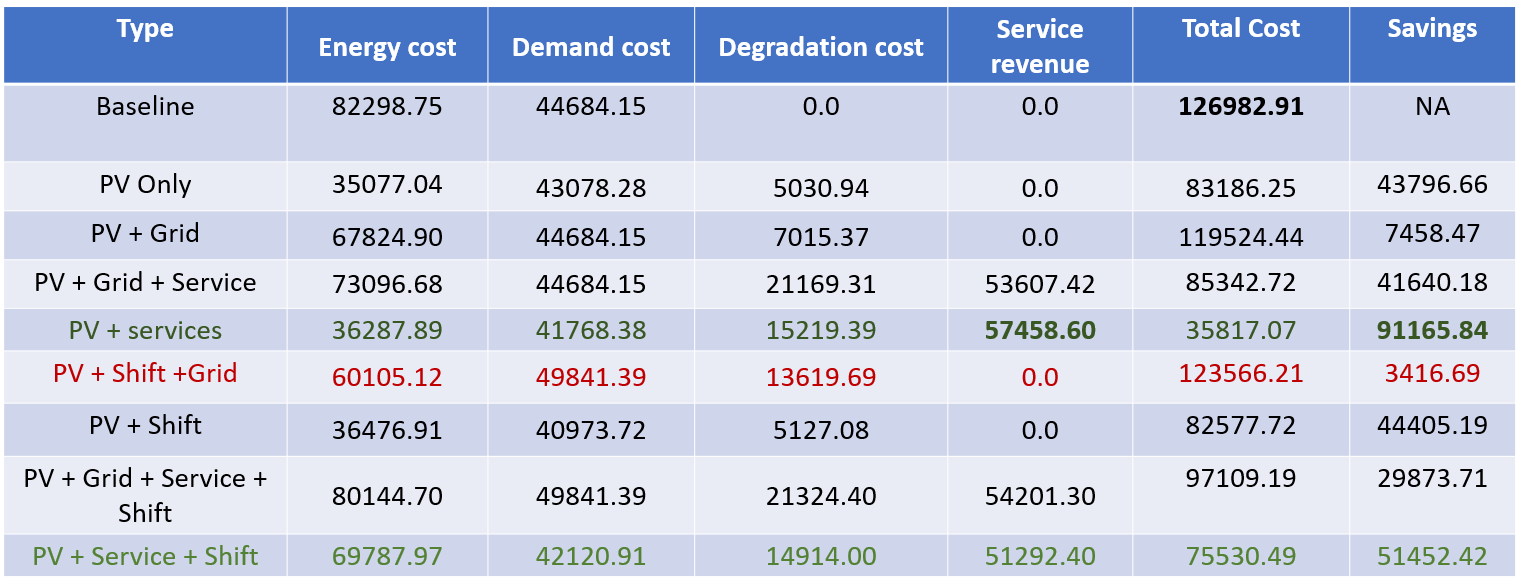


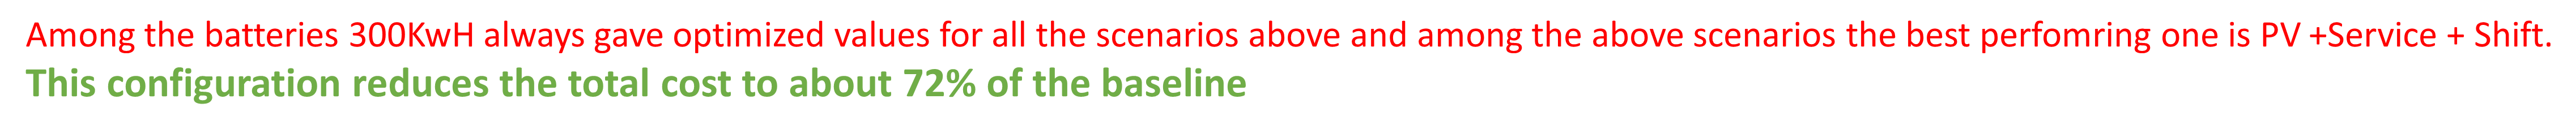

# Forecasting Using ML

In [53]:
def make_features(_df: pd.DataFrame) -> pd.DataFrame:
    X = pd.DataFrame(index=_df.index)
    # Calendar features
    X["hour"]  = _df.index.hour
    X["dow"]   = _df.index.dayofweek #dow = day of week
    X["month"] = _df.index.month
    X["is_we"] = (X["dow"] >= 5).astype(int) #for weekends if weekend true or else false

    # Lags (yesterday & last week)
    X["load_lag24"]  = _df["load_kw"].shift(24)
    X["load_lag168"] = _df["load_kw"].shift(24*7)
    X["pv_lag24"]    = _df["pv_kw"].shift(24)
    X["pv_lag168"]   = _df["pv_kw"].shift(24*7)

    # rolling means average over last 24 hours (but shifted by 1, so you don’t “peek” at the future).
    X["load_roll24"] = _df["load_kw"].shift(1).rolling(24).mean()
    X["pv_roll24"]   = _df["pv_kw"].shift(1).rolling(24).mean()


    # Price by hour (historical mean)
    price_by_hour = _df.groupby(_df.index.hour)[price_col].mean()
    X["price_hour_mean"] = X["hour"].map(price_by_hour)

    return X

X = make_features(data)
y_load = data["load_kw"].copy()
y_pv   = data["pv_kw"].copy()

# Drop rows with NaNs from lags/rolling
mask = X.notna().all(axis=1)
X, y_load, y_pv = X[mask], y_load[mask], y_pv[mask]


In [42]:
#splitting into train and test
split_date = X.index.max() - pd.Timedelta(days=30)
is_train = X.index < split_date

X_tr, X_te = X[is_train], X[~is_train]
yL_tr, yL_te = y_load[is_train], y_load[~is_train]
yP_tr, yP_te = y_pv[is_train],   y_pv[~is_train]


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Baseline: yesterday same hour
baseline_load_pred = X_te["load_lag24"].values
baseline_pv_pred   = X_te["pv_lag24"].values

# Fill rare NaNs with hourly means from train
if np.isnan(baseline_load_pred).any():
    hourly_mean_load = yL_tr.groupby(X_tr["hour"]).transform("mean")
    baseline_load_pred = np.where(np.isnan(baseline_load_pred),
                                  hourly_mean_load[-len(baseline_load_pred):],
                                  baseline_load_pred)

if np.isnan(baseline_pv_pred).any():
    hourly_mean_pv = yP_tr.groupby(X_tr["hour"]).transform("mean")
    baseline_pv_pred = np.where(np.isnan(baseline_pv_pred),
                                hourly_mean_pv[-len(baseline_pv_pred):],
                                baseline_pv_pred)

feat_cols = X_tr.columns.tolist()

# Train models
#for Loads
lrL = LinearRegression().fit(X_tr[feat_cols], yL_tr)
rfL = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1).fit(X_tr[feat_cols], yL_tr)

#for PV
lrP = LinearRegression().fit(X_tr[feat_cols], yP_tr)
rfP = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1).fit(X_tr[feat_cols], yP_tr)

# Predictions
predL_lr = lrL.predict(X_te[feat_cols])
predL_rf = rfL.predict(X_te[feat_cols])
predP_lr = np.clip(lrP.predict(X_te[feat_cols]), 0, None)  # PV >= 0
predP_rf = np.clip(rfP.predict(X_te[feat_cols]), 0, None)


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

"""
    Masked Mean Absolute Percentage Error (MAPE).
    - Normal MAPE = mean(|(y_true - y_pred) / y_true|).
    - Problem: For PV (solar), y_true can be 0 or very small (nighttime),
      which makes division blow up and gives meaningless huge errors.
    - Solution: Mask out (ignore) all values where y_true <= thr (e.g., 0.1).
      This ensures we only compute % error when generation is significant.
    - eps avoids division by zero in case of very small values.
    """

def masked_mape(y_true, y_pred, eps=1e-6, thr=0.1):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    mask = y_true > thr
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / np.maximum(eps, y_true[mask]))).mean() * 100

"""
    Normalized Mean Absolute Percentage Error (nMAPE).
    - Instead of dividing error by the actual value at each timestep
      (like MAPE), we divide by the global peak value of y_true.
    - This gives an error as a % of system scale (e.g., "2% of PV capacity").
    - Useful for PV because:
        * At night, y_true ~ 0 → MAPE is unstable.
        * nMAPE avoids the zero problem by normalizing errors globally.
    - For Load, plain MAPE is fine (since it's never ~0),
      but we can still use nMAPE if we want a scale-based comparison.
    """
def nmape(y_true, y_pred, peak=None):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    peak = max(1e-6, float(np.nanmax(y_true))) if peak is None else max(1e-6, float(peak))
    return (np.abs(y_true - y_pred).mean() / peak) * 100

def eval_reg(y_true, y_pred, for_pv=False, pv_peak=None):
    mae  = mean_absolute_error(y_true, y_pred)
    # Removed squared=False as it's not supported in this sklearn version
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    if for_pv:
        return mae, rmse, r2, masked_mape(y_true, y_pred), nmape(y_true, y_pred, pv_peak)
    else:
        mape = (np.abs((y_true - y_pred) / np.maximum(1e-6, y_true))).mean() * 100
        return mae, rmse, r2, mape, np.nan

rows = []
rows.append(("LOAD  - LinearRegression",) + eval_reg(yL_te, predL_lr))
rows.append(("LOAD  - RandomForest",)     + eval_reg(yL_te, predL_rf))

pv_peak = float(yP_tr.max())
rows.append(("PV    - LinearRegression",) + eval_reg(yP_te, predP_lr, True, pv_peak))
rows.append(("PV    - RandomForest",)     + eval_reg(yP_te, predP_rf, True, pv_peak))

metrics_df_fixed = pd.DataFrame(
    rows, columns=["model","MAE","RMSE","R2","MAPE_or_masked_%","nMAPE_%"]
)
metrics_df_fixed

,model,MAE,RMSE,R2,MAPE_or_masked_%,nMAPE_%
0,LOAD - LinearRegression,0.437002,0.560044,0.811423,23.984201,NaN
1,LOAD - RandomForest,0.402082,0.505465,0.846388,21.893700,NaN
2,PV - LinearRegression,0.160321,0.286689,0.975247,15.733406,2.226213
3,PV - RandomForest,0.156997,0.276052,0.977050,14.726825,2.180061


In all of them RF was performing best for both Load and PV so we use that model for further forecasting things


In [45]:
# Next-day hourly index
start_next = data.index.max() + pd.Timedelta(hours=1)
future_idx = pd.date_range(start_next, periods=24, freq="H")

# Extend df to compute lags/rolling
stub = pd.DataFrame(index=future_idx, data={"load_kw": np.nan, "pv_kw": np.nan, price_col: np.nan})
df_ext = pd.concat([data, stub], axis=0)

X_ext = make_features(df_ext)
X_future = X_ext.loc[future_idx, feat_cols]

# RF performned best among the models we choosen so
load_next = rfL.predict(X_future)
pv_next   = np.clip(rfP.predict(X_future), 0, None)

price_by_hour = data.groupby(data.index.hour)[price_col].mean()
price_next = pd.Series(future_idx.hour).map(price_by_hour).values

forecast_next_day = pd.DataFrame({
    "forecast_load_kw": load_next,
    "forecast_pv_kw":   pv_next,
    "forecast_price":   price_next
}, index=future_idx)

forecast_next_day["forecast_net_load_kw"]    = (forecast_next_day["forecast_load_kw"] - forecast_next_day["forecast_pv_kw"]).clip(lower=0)
forecast_next_day["forecast_pv_surplus_kw"]   = (forecast_next_day["forecast_pv_kw"]   - forecast_next_day["forecast_load_kw"]).clip(lower=0)
forecast_next_day.head(12)


/tmp/ipython-input-3463121732.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_idx = pd.date_range(start_next, periods=24, freq="H")


,forecast_load_kw,forecast_pv_kw,forecast_price,forecast_net_load_kw,forecast_pv_surplus_kw
2025-01-01 00:00:00,1.985070,0.000000,3.0,1.985070,0.000000
2025-01-01 01:00:00,1.975258,0.000000,3.0,1.975258,0.000000
2025-01-01 02:00:00,1.970077,0.000000,3.0,1.970077,0.000000
2025-01-01 03:00:00,1.875016,0.000000,3.0,1.875016,0.000000
2025-01-01 04:00:00,1.981802,0.000000,3.0,1.981802,0.000000
2025-01-01 05:00:00,1.893124,0.000000,3.0,1.893124,0.000000
2025-01-01 06:00:00,1.956447,0.072470,5.0,1.883977,0.000000
2025-01-01 07:00:00,1.883393,1.436779,5.0,0.446614,0.000000
2025-01-01 08:00:00,1.975409,2.695583,5.0,0.000000,0.720174
2025-01-01 09:00:00,2.034683,3.761442,5.0,0.000000,1.726758


In [46]:
def suggest_plan(day_df, charge_frac=0.35, discharge_frac=0.25):
    # Cheapest ~35% hours to charge; priciest ~25% to discharge
    q_low  = day_df["forecast_price"].quantile(charge_frac) #cheapest chunk of hours to charge
    q_high = day_df["forecast_price"].quantile(1 - discharge_frac)  #priciest chunk to discharge using forecasts

    charge_hours = day_df.index[
        (day_df["forecast_pv_surplus_kw"] > 0) | (day_df["forecast_price"] <= q_low)
    ]
    discharge_hours = day_df.index[
        (day_df["forecast_price"] >= q_high) & (day_df["forecast_net_load_kw"] > 0)
    ]
    return sorted(set(charge_hours.hour)), sorted(set(discharge_hours.hour))

ch_hrs, dis_hrs = suggest_plan(forecast_next_day)
print(" Suggested CHARGE hours:", ch_hrs)
print(" Suggested DISCHARGE hours:", dis_hrs)

plan_flags = pd.DataFrame(index=forecast_next_day.index)
plan_flags["plan_charge"]    = plan_flags.index.hour.isin(ch_hrs).astype(int)
plan_flags["plan_discharge"] = plan_flags.index.hour.isin(dis_hrs).astype(int)
plan_flags.head(24)


 Suggested CHARGE hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23]
 Suggested DISCHARGE hours: [6, 7, 17, 18, 19, 20, 21]


,plan_charge,plan_discharge
2025-01-01 00:00:00,1,0
2025-01-01 01:00:00,1,0
2025-01-01 02:00:00,1,0
2025-01-01 03:00:00,1,0
2025-01-01 04:00:00,1,0
2025-01-01 05:00:00,1,0
2025-01-01 06:00:00,1,1
2025-01-01 07:00:00,1,1
2025-01-01 08:00:00,1,0
2025-01-01 09:00:00,1,0


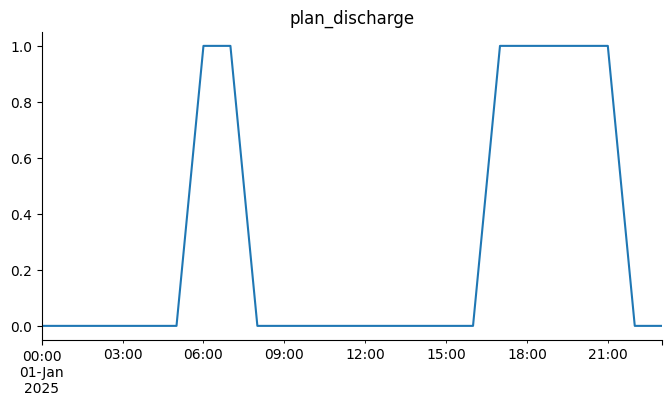

In [49]:
# @title plan_discharge

from matplotlib import pyplot as plt
plan_flags['plan_discharge'].plot(kind='line', figsize=(8, 4), title='plan_discharge')
plt.gca().spines[['top', 'right']].set_visible(False)